# Project Title
Predicting probability of heart disease based on different risk factors
# Project Proposal
Using Heart Disease UCI and Heart Failure Clinical Data databases, our goal is to identify which risk factors are more strongly related to heart disease, and develop a model to predict the probability of heart disease using these risk factors.
# Reference to Data Sources
## Heart Disease UCI
Acknowledgements
Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

*Link*
https://www.kaggle.com/ronitf/heart-disease-uci 

## Heart Failure Clinical Data
Creator
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020).
Original Publication
https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

*Link*
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


In [ ]:
%%bigquery
SELECT *
FROM `heart_disease_dataset.heart_disease_ICU`;

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0
3,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
4,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
299,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1
300,60,0,3,150,240,0,1,171,0,0.9,2,0,2,1
301,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
%%bigquery
SELECT *
FROM `heart_disease_dataset.heart_failure_clinical_data`;

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


# Table information

The heart disease ICU dataset contains 13 fields that can be used to predict heart failure in patients admitted to the hospital. These fields include resting blood pressure, blood sugar levels and maximum heart rate achieved, thus showing this dataset is focused on biological indicators for each of the 303 patients. The 14 field (Target) marks the presence of heart disease as 1 or the absence of it as 0.

Meanwhile, the heart failure clinical data dataset provides biological indicators as well as behavioral risk factors such as if a patient is a smoker. This dataset can be also used to determine the mortality of patients with heart disease and it would be interesting to see the relationship between tables and variables.

We have queried the tables to ensure there are no null/missing values, which will help with our analysis.

# Exploratory Phase
Our goal should be around who is more likely to have heart failure and most important risk factors? 
Target variable: heart failure 
Number of observations :299
Number of features : 12


In [23]:
%%bigquery 
select * from `heart_disease_dataset.heart_failure_clinical_data` where DEATH_EVENT = 1 order by age

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.30,136,0,0,65,1
1,45.0,0,582,0,14,0,166000.00,0.80,127,1,0,14,1
2,45.0,0,582,0,20,1,126000.00,1.60,135,1,0,180,1
3,45.0,0,7702,1,25,1,390000.00,1.00,139,1,0,60,1
4,45.0,1,981,0,30,0,136000.00,1.10,137,1,0,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
92,90.0,1,60,1,50,0,226000.00,1.00,134,1,0,30,1
93,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
94,95.0,1,112,0,40,1,196000.00,1.00,138,0,0,24,1


In [5]:
%%bigquery
SELECT count(anaemia) as A, CAST(ROUND(count(anaemia)/299*100,2) AS STRING)||'%' as percentage_of_anaemia
FROM  `heart_disease_dataset.heart_failure_clinical_data` 
where anaemia = 1 


,A,percentage_of_anaemia
0,129,43.14%


In [4]:
%%bigquery
SELECT count(*) as D, CAST(ROUND(count(*)/299*100,2) AS STRING)||'%' as percentage_of_diabetes
FROM  `heart_disease_dataset.heart_failure_clinical_data` 
where diabetes = 1 

,D,percentage_of_diabetes
0,125,41.81%


In [3]:
%%bigquery
SELECT count(*) as H, CAST(ROUND(count(*)/299*100,2) AS STRING)||'%' as percentage_of_high_blood_pressure
FROM `heart_disease_dataset.heart_failure_clinical_data` 
where high_blood_pressure = 1 

,H,percentage_of_high_blood_pressure
0,105,35.12%


### Males are more likely to have heart failure according to the data.

In [2]:
%%bigquery
SELECT count(*) as Male, CAST(ROUND(count(*)/299*100,2) AS STRING)||'%' as percentage_of_male
FROM `heart_disease_dataset.heart_failure_clinical_data` 
where sex = 1 

,Male,percentage_of_male
0,194,64.88%


In [1]:
%%bigquery
SELECT count(*) as S, CAST(ROUND(count(*)/299*100,2) AS STRING)||'%' as percentage_of_smoking
FROM  `heart_disease_dataset.heart_failure_clinical_data` 
where smoking = 1 

,S,percentage_of_smoking
0,96,32.11%


### As per our research, we discovered that ejection fraction can be grouped in three categories, low if <40 , normal if between 50 and 70 and high if >75.
Thus, we grouped the data to see how many patients were in each of the groups, showing that most patients suffer from low ejection fraction, and thus it shows it is a crucial factor in determining heart failure.

In [1]:
%%bigquery
SELECT ejection_fraction_level, CAST(ROUND(count(ejection_fraction)/299*100,2)AS STRING)||'%' AS Percentage
FROM(
SELECT 
*,
CASE 
  WHEN ejection_fraction < 50 THEN 'LOW'
  WHEN ejection_fraction >= 50 AND ejection_fraction <70 THEN 'NORMAL'
  ELSE 'HIGH' END AS ejection_fraction_level
FROM `ba775-team-7b.heart_disease_dataset.heart_failure_clinical_data`) AS q1
GROUP BY ejection_fraction_level
ORDER BY Percentage DESC

,ejection_fraction_level,Percentage
0,LOW,79.93%
1,NORMAL,19.4%
2,HIGH,0.67%


### Research showed that serum_creatinine can be grouped in three categories, a normal range is between 0.5 and 1.2 mg/dl. Thus we decided to see the proportion of patients with normal levels of serum_creatinine (0.5-1.2), the proportion with slightly high levels of creatinine (1.2-2.2) and the proportion of patients with very high levels of creatinine(>2.2). 

In [2]:
%%bigquery
SELECT Creatinine_Level, CAST(ROUND(count(Creatinine_Level)/299*100,2)AS STRING)||'%' AS Percentage
FROM(
SELECT 
*,
CASE 
  WHEN serum_creatinine >= 0.5 AND serum_creatinine <1.2 THEN '0.5-1.2 (normal)'
  WHEN serum_creatinine >= 1.2 AND serum_creatinine <2.2 THEN '1.2-2.2'
  ELSE '>2.2' END AS Creatinine_Level
FROM `ba775-team-7b.heart_disease_dataset.heart_failure_clinical_data`) AS q1
GROUP BY Creatinine_Level
ORDER BY Percentage DESC

,Creatinine_Level,Percentage
0,>2.2,9.7%
1,0.5-1.2 (normal),58.19%
2,1.2-2.2,32.11%


### We investigated the proportion of patients who died in the time between the check ups.

In [30]:
%%bigquery
SELECT count(DEATH_EVENT) as death, CAST(ROUND(count(DEATH_EVENT)/299*100,2) AS STRING)||'%' as percentage
FROM `heart_disease_dataset.heart_failure_clinical_data`
where DEATH_EVENT = 1

,death,percentage
0,96,32.11%


### What age group is more likely to have heart failure?
Through our querying we determined that the patients in the 65+ age group are more likely to have heart failure

In [28]:
%%bigquery
select age_group,CAST(ROUND(count(age_group)/299 * 100,2) AS STRING)||'%' AS percentage_age_group
from
(select *,
case 
when age <35 then '< 35'
when age <45 then '35-45'
when age <55 then '45-55'
when age <65 then '55-65'
else '>65' end as age_group
from `heart_disease_dataset.heart_failure_clinical_data`)
group by age_group
order by age_group

,age_group,percentage_age_group
0,35-45,6.02%
1,45-55,25.75%
2,55-65,29.77%
3,>65,38.46%


# ML Models for Heart Disease Prediction
We decided to create ML classification models on both datasets to predict the presence of heart failure in a patient, and the likelihood of death due to heart failure.
Below are the queries we ran and the resulting models.

## Heart Disease ICU

*Training the model*

We decided to use 200 patients to train the model, thus having 103 patients available to evaluate the model.

In [1]:
%%bigquery
CREATE OR REPLACE MODEL `heart_disease_dataset.heart_disease_prediction_model`
OPTIONS
(
  model_type = 'logistic_reg',
  labels = ['target']
  )
  AS

  SELECT 
    * 
    FROM
    `heart_disease_dataset.heart_disease_ICU`
    LIMIT 200

""


*Evaluating the model*

In [2]:
%%bigquery
SELECT 
  *
FROM 
  ML.EVALUATE(MODEL heart_disease_dataset.heart_disease_prediction_model,(

SELECT * EXCEPT (id)
FROM(
  SELECT 
    row_number() OVER() AS id, * 
   FROM
    `heart_disease_dataset.heart_disease_ICU`
    ORDER BY id DESC
    LIMIT 103) AS t1
    
))


,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.88764,0.940476,0.854369,0.913295,0.347191,0.838757


*Testing the model by comparing its predictions with the actual values*

In [3]:
%%bigquery
SELECT 
  *
FROM 
  ML.PREDICT(MODEL heart_disease_dataset.heart_disease_prediction_model,(

  SELECT 
     * 
   FROM
    `heart_disease_dataset.heart_disease_ICU`
    WHERE MOD(chol,2)=1
))


,predicted_target,predicted_target_probs,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,"[{'label': 1, 'prob': 0.019996993110396877}, {...",53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
1,0,"[{'label': 1, 'prob': 0.0045105810426048975}, ...",55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
2,0,"[{'label': 1, 'prob': 0.019461270787139884}, {...",56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
3,0,"[{'label': 1, 'prob': 0.2207583854926245}, {'l...",44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
4,1,"[{'label': 1, 'prob': 0.6600853879741312}, {'l...",48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,"[{'label': 1, 'prob': 0.9559590900715141}, {'l...",58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
150,1,"[{'label': 1, 'prob': 0.8462471952986345}, {'l...",69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
151,1,"[{'label': 1, 'prob': 0.6553271199966842}, {'l...",40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
152,0,"[{'label': 1, 'prob': 0.3551386627477297}, {'l...",51,1,3,125,213,0,0,125,1,1.4,2,1,2,1


## Heart Failure Dataset

*Training the model*

We again decided to train the model using 200 patients to have a pool of patients to use to evaluate the model later on.

In [6]:
%%bigquery
CREATE OR REPLACE MODEL `heart_disease_dataset.heart_failure_death_model`
OPTIONS
(
  model_type = 'logistic_reg',
  labels = ['DEATH_EVENT']
  )
  AS
  SELECT 
    * 
   FROM
   `heart_disease_dataset.heart_failure_clinical_data`
   LIMIT 200

""


*Evaluating the model*

In [7]:
%%bigquery
SELECT 
  *
FROM 
  ML.EVALUATE(MODEL heart_disease_dataset.heart_failure_death_model,(
  SELECT * EXCEPT (id)
  FROM(
  SELECT 
    row_number() OVER() as id, * 
   FROM
   `heart_disease_dataset.heart_failure_clinical_data`
   ORDER BY id DESC
   LIMIT 99)
  )) 

,precision,recall,accuracy,f1_score,log_loss,roc_auc
0,0.777778,0.636364,0.878788,0.7,0.268556,0.940584


*Testing the model by comparing its predictions and the actual values*

In [8]:
%%bigquery
SELECT 
  *
FROM 
  ML.PREDICT(MODEL heart_disease_dataset.heart_failure_death_model,(
  SELECT 
    * 
   FROM
   `heart_disease_dataset.heart_failure_clinical_data`
   WHERE MOD( creatinine_phosphokinase,2)=1
   ))

,predicted_DEATH_EVENT,predicted_DEATH_EVENT_probs,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1,"[{'label': 1, 'prob': 0.7612216936225705}, {'l...",53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
1,1,"[{'label': 1, 'prob': 0.8584580194369403}, {'l...",70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
2,1,"[{'label': 1, 'prob': 0.6512339098974516}, {'l...",70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
3,0,"[{'label': 1, 'prob': 0.23322400493519146}, {'...",72.0,0,211,0,25,0,274000.0,1.2,134,0,0,207,0
4,1,"[{'label': 1, 'prob': 0.7196042129350695}, {'l...",50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0,"[{'label': 1, 'prob': 0.1256281445628145}, {'l...",60.0,1,737,0,60,1,210000.0,1.5,135,1,1,95,0
114,0,"[{'label': 1, 'prob': 0.02582669207714688}, {'...",63.0,0,193,0,60,1,295000.0,1.3,145,1,1,107,0
115,0,"[{'label': 1, 'prob': 0.02112592872580534}, {'...",70.0,1,171,0,60,1,176000.0,1.1,145,1,1,146,0
116,0,"[{'label': 1, 'prob': 0.02297401214803972}, {'...",60.0,1,95,0,60,0,337000.0,1.0,138,1,1,146,0


# Heart Disease Informational Dashboard

*Link to dashboard*

https://prod-useast-a.online.tableau.com/t/soltaniehha/views/Team7b2_0/PredictingHeartDisease?:showAppBanner=false&:display_count=n&:showVizHome=n&:origin=viz_share_link

*Screenshot 1*

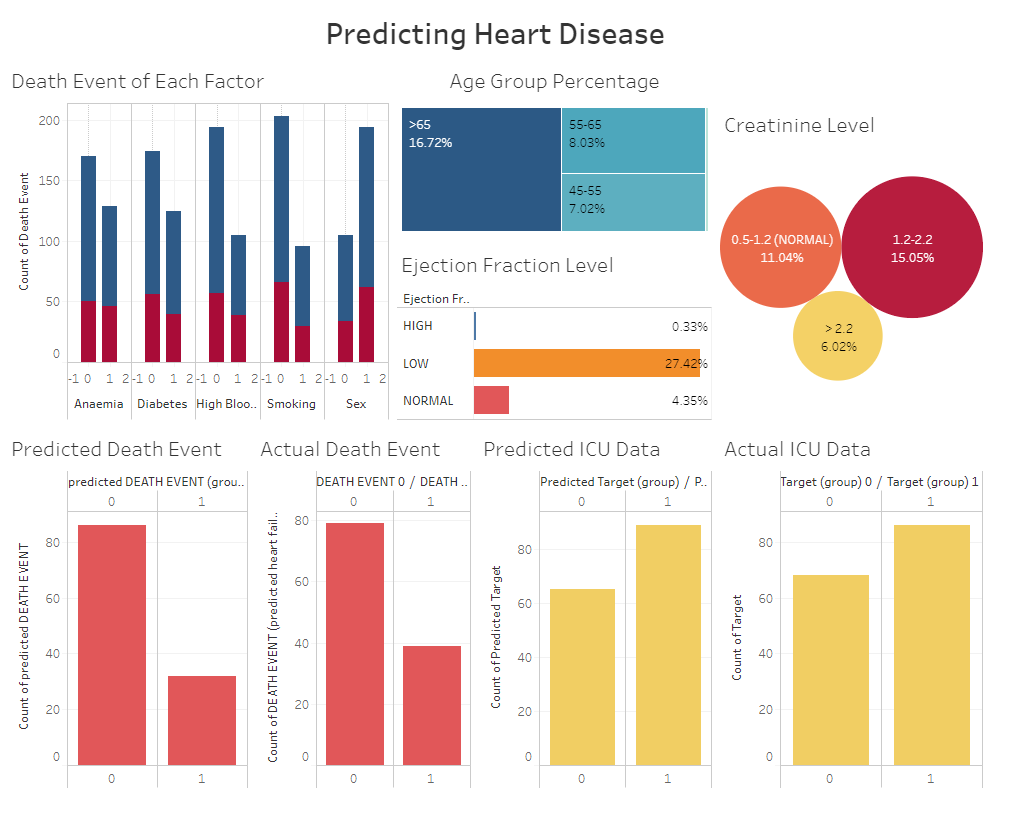